# Using the updated 16S data

The Arivale data still includes microbiome data geenrated with an outdated pipeline. The raw data was processed in 2020 with DADA2 to yield alternative sequence variants and more thorough taxonomic classification. The new data is presented in 3 tables:

1. **ASV abundances**: contains the read counts for each ASV in each sample
2. **sample metadata**: annotates each sample with the individual it came from and the timestamp
3. **ASV taxonomy**: contains the taxonomic classification and full sequence of the ASV

Let's load all of those and take a look.

## ASV table

In [1]:
import pandas as pd
asvs = pd.read_csv("/proj/arivale/microbiome/16S_processed/asvs.csv")
asvs.head()

,id,hash,count
0,22001612560016|GFM-1079-001,c2d3fc09212e226b3a2c3398a1af9436,1285
1,22001612560023|GFM-1079-001,c2d3fc09212e226b3a2c3398a1af9436,2431
2,22001612560062|GFM-1079-001,c2d3fc09212e226b3a2c3398a1af9436,4908
3,22001612560065|GFM-1079-001,c2d3fc09212e226b3a2c3398a1af9436,3944
4,22001612560067|GFM-1079-001,c2d3fc09212e226b3a2c3398a1af9436,5990


Here the ID identifies the sample that was analyzed and hash is the MD5 hash for each unique alternative sequence that was found by DADA2. This table by itself is not very informative. But we can check how many unique sequences and samples there are:

In [3]:
print("#samples:\t", asvs.id.nunique())
print("#sequences:\t", asvs.hash.nunique())

#samples:	 5232
#sequences:	 89022


## Sample metadata

Let's start by looking what the samples actually refer to.

In [4]:
samples = pd.read_csv("/proj/arivale/microbiome/16S_processed/metadata.csv")
samples.head()

,public_client_id,genome_id,genome_vendor,multiple_genome_ids,client_id,user_id,sex,race,has_research_consent,enterprise,...,latest_program,is_helix,age,vendor_observation_id,days_in_program,days_since_first_call,days_since_first_draw,month,weekday,id
0,01569570,A941AR529-005,NEXTCODE,NaN,261.0,b37fbfc0-768f-4f68-b6be-36f13d8ad329,F,asian,True,d4cd0dabcf4caa22,...,f2a606fd0be34862,False,34.0,AV15-1002,6.0,-8.0,0.0,Jul,Wed,AV15-1002|AKE001
1,01159906,A941AR616-005,NEXTCODE,NaN,309.0,6549a1cf-46e2-4440-b287-1caee1546ff9,F,white,True,d4cd0dabcf4caa22,...,65d2ea03425887a7,False,55.0,AV15-1004,16.0,-4.0,0.0,Jul,Thu,AV15-1004|AKE001
2,01152098,A941AR617-005,NEXTCODE,NaN,269.0,098b05c5-b32d-485d-99fc-c59d070b61b1,F,white,True,d4cd0dabcf4caa22,...,bf729f887c1f4d4a,False,53.0,AV15-1007,16.0,0.0,0.0,Jul,Thu,AV15-1007|AKE001
3,01347882,A941AR623-005,NEXTCODE,NaN,328.0,1d4699f2-aa61-4953-8a31-5d184ba9eb19,M,white,True,d4cd0dabcf4caa22,...,65d2ea03425887a7,False,66.0,AV15-1008,16.0,-6.0,0.0,Jul,Thu,AV15-1008|AKE001
4,01910870,A941AR699-005,NEXTCODE,NaN,262.0,dda29c87-27b6-411b-8d6d-0a9e1a6c5ea5,M,white,True,d4cd0dabcf4caa22,...,65d2ea03425887a7,False,48.0,AV15-1014,13.0,-8.0,0.0,Jul,Tue,AV15-1014|AKE001


The last column is named `id` and corresponds to the `id` columsn from the asv table. We can merge some of this info into the asv table.

In [16]:
merged = pd.merge(asvs, samples[["id", "public_client_id", "sex", "age", "days_in_program"]], on="id")
merged.head()

,id,hash,count,public_client_id,sex,age,days_in_program
0,22001612560016|GFM-1079-001,c2d3fc09212e226b3a2c3398a1af9436,1285,01884560,F,42.0,8.0
1,22001612560016|GFM-1079-001,a425c9ccfd2d87768c9524f0a798ee2d,4382,01884560,F,42.0,8.0
2,22001612560016|GFM-1079-001,11e733f60337e5ef6c9a94a66841d20b,2149,01884560,F,42.0,8.0
3,22001612560016|GFM-1079-001,2582ff55b130be55a786156c3da4dcf8,2414,01884560,F,42.0,8.0
4,22001612560016|GFM-1079-001,1b27d58b80b4572b40e8145199d068a7,64,01884560,F,42.0,8.0


Ok that looks better.

## Taxonomy

So now we have annotated the samples, but what about the ASVs? Let's load the taxonomy for the ASVs.

In [21]:
tax = pd.read_csv("/proj/arivale/microbiome/16S_processed/taxonomy.csv")
tax.head()

,Kingdom,Phylum,Class,Order,Family,Genus,Species,sequence,id
0,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,Bacteroidaceae,Bacteroides,vulgatus,GCAGCAGTGAGGAATATTGGTCAATGGGCGAGAGCCTGAACCAGCC...,c2d3fc09212e226b3a2c3398a1af9436
1,Bacteria,Firmicutes,Clostridia,Clostridiales,Ruminococcaceae,Faecalibacterium,prausnitzii,GCAGCAGTGGGGAATATTGCACAATGGGGGAAACCCTGATGCAGCG...,a425c9ccfd2d87768c9524f0a798ee2d
2,Bacteria,Firmicutes,Clostridia,Clostridiales,Lachnospiraceae,Agathobacter,NaN,GCAGCAGTGGGGAATATTGCACAATGGGCGAAAGCCTGATGCAGCG...,11e733f60337e5ef6c9a94a66841d20b
3,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,Bacteroidaceae,Bacteroides,NaN,GCAGCAGTGAGGAATATTGGTCAATGGGCGATGGCCTGAACCAGCC...,7ed48cd35b68995ff96e23b89c9018c5
4,Bacteria,Firmicutes,Clostridia,Clostridiales,Lachnospiraceae,Blautia,NaN,GCAGCAGTGGGGAATATTGCACAATGGGGGAAACCCTGATGCAGCG...,2582ff55b130be55a786156c3da4dcf8


Much more informative let's join the taxonomy with the original data as well.

In [22]:
tax = tax.drop("sequence", axis=1).rename(columns={"id": "hash"})
merged = pd.merge(merged, tax, on="hash")
merged.head()

,id,hash,count,public_client_id,sex,age,days_in_program,Kingdom,Phylum,Class,Order,Family,Genus,Species
0,22001612560016|GFM-1079-001,c2d3fc09212e226b3a2c3398a1af9436,1285,01884560,F,42.0,8.0,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,Bacteroidaceae,Bacteroides,vulgatus
1,22001612560023|GFM-1079-001,c2d3fc09212e226b3a2c3398a1af9436,2431,01192392,F,31.0,3.0,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,Bacteroidaceae,Bacteroides,vulgatus
2,22001612560062|GFM-1079-001,c2d3fc09212e226b3a2c3398a1af9436,4908,01349735,F,54.0,8.0,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,Bacteroidaceae,Bacteroides,vulgatus
3,22001612560065|GFM-1079-001,c2d3fc09212e226b3a2c3398a1af9436,3944,01735977,F,58.0,16.0,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,Bacteroidaceae,Bacteroides,vulgatus
4,22001612560067|GFM-1079-001,c2d3fc09212e226b3a2c3398a1af9436,5990,01363623,F,52.0,11.0,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,Bacteroidaceae,Bacteroides,vulgatus


Okay this is a nice long format abundance table.

## Collapsing on a taxa rank

The merged table can be collapsed quite easily into higher taxonomic ranks. To summarize on the phylum level for instance:

In [24]:
phylum = merged.groupby(["id", "Phylum"])["count"].sum().reset_index()
phylum.head()

,id,Phylum,count
0,22001612560009|GFM-1079-007,Actinobacteria,3547
1,22001612560009|GFM-1079-007,Bacteroidetes,56355
2,22001612560009|GFM-1079-007,Cyanobacteria,22
3,22001612560009|GFM-1079-007,Euryarchaeota,5
4,22001612560009|GFM-1079-007,Firmicutes,135611


This can be used to visualize phylum composition for instance:

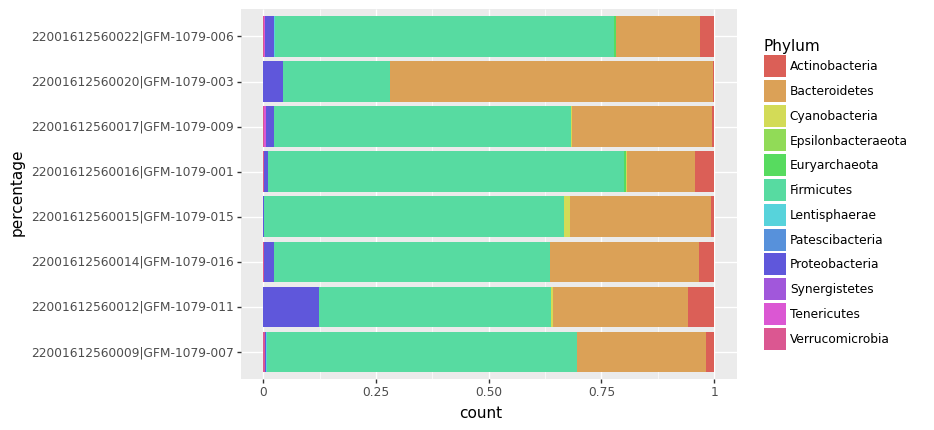

<ggplot: (8760398288884)>

In [53]:
small = phylum[phylum.id.isin(phylum.id.unique()[0:8])]
(ggplot(small, aes(x="id", y="count", fill="Phylum")) + 
 geom_bar(stat="identity", position="fill") + 
 coord_flip() + labs(x = "percentage"))